# **Capstone Project Module 3 : Bank Marketing Campaign**
### Created By : Adeline Kartika Tiku Putri (JCDSOL-013)

## **Business Problem Understanding**

**Context**

Sebuah bank ingin meningkatkan efektivitas kampanye pemasaran mereka untuk produk deposito. Mereka ingin memastikan bahwa upaya pemasaran mereka ditargetkan pada calon nasabah yang paling mungkin menerima tawaran deposito. Deposito adalah produk simpanan di bank yang menawarkan bunga lebih tinggi dibandingkan tabungan biasa. Dana yang disimpan di deposito tidak dapat ditarik sewaktu-waktu, melainkan harus mengikuti jangka waktu yang telah disepakati antara nasabah dan bank. Sumber: [CIMB Niaga](https://www.cimbniaga.co.id/id/inspirasi/perencanaan/pengertian-deposito-yang-harus-anda-pahami).

Saat ini, bank menggunakan pendekatan pemasaran yang umum dan ingin beralih ke pendekatan yang lebih data-driven menggunakan teknologi machine learning. Dimana bank ingin mengoptimalkan perolehan calon nasabah sebanyak mungkin sambil memastikan efisiensi dan mengurangi biaya pemasaran.

Target:
* 0 : Calon nasabah tidak menerima tawaran deposit.
* 1 : Calon nasabah menerima tawaran deposit.

**Problem Statement**

Masalah utama adalah bagaimana memprediksi dengan akurat apakah seorang calon nasabah  akan menerima tawaran deposito dari bank. Dengan prediksi yang lebih tepat, bank dapat mengalokasikan sumber daya pemasaran mereka dengan lebih efisien, meningkatkan tingkat konversi dari kampanye pemasaran mereka, serta menambah jumlah nasabah baru secara signifikan.

**Goals**
* Meningkatkan tingkat konversi kampanye pemasaran untuk produk deposito yang berarti meningkatkan persentase calon pelanggan yang menerima tawaran deposito setelah dihubungi melalui kampanye pemasaran. Dengan kata lain, meningkatkan jumlah calon pelanggan yang akhirnya membuka rekening deposito di bank setelah mereka menerima penawaran atau informasi dari kampanye pemasaran tersebut.
* Mengurangi biaya dan waktu yang diperlukan untuk menjangkau calon nasabah yang kurang mungkin menerima tawaran deposit.
* Mengetahui fitur/faktor apa saja yang membuat nasabah tertarik untuk menerima tawaran deposito

**Analytic Approach**

Kami akan menggunakan pendekatan machine learning untuk membangun model prediksi. Pendekatan ini akan melibatkan analisis data untuk menemukan pola yang membedakan calon nasabah yang mau menerima tawaran deposito atau tidak.

Selanjutnya akan dibangun model klasifikasi yang bisa membantu bank tersebut untuk memprediksi probablitas calon nasabah akan menerima tawaran deposito atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi : sia-sianya sumber daya, biaya pemasaran, dan waktu

Type 2 error : False Negative  
Konsekuensi : kehilangan calon nasabah yang tertarik untuk melakukan deposit 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi biaya pemasaran dari bank tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup calon nasabah yang potensial untuk melakukan deposito. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah F1-Score.

F1-Score ini menggabungkan presisi dan recall untuk memberikan gambaran keseluruhan tentang kinerja model. Untuk memahami seberapa baik model kita dalam mengidentifikasi calon pelanggan yang sebenarnya menerima tawaran (presisi) dan seberapa baik model kita dalam menangkap semua calon nasabah yang seharusnya menerima tawaran (recall). Seberapa akurat model kita dalam memprediksi apakah seorang calon nasabah akan menerima tawaran deposito atau tidak.

## **Data Understanding**

Sumber Dataset : https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW

**Features**

| Fitur | Tipe Data | Deskripsi |
| --- | --- | --- |
| age | integer | Umur pelanggan |
| job | object | Pekerjaan pelanggan |
| balance | integer | Rata-rata pendapatan tahunan |
| housing | object | Memiliki cicilan rumah |
| loan | object | Memiliki hutang personal |
| contact | object | Tipe kontak komunikasi |
| month | object | Kontak terakhir dalam setahun |
| campaign | integer | Jumlah kontak yang dilakukan selama kampanye pada pelanggan |
| pdays | integer | Jumlah hari berlalu setelah customer terakhir dihubungi dari kampanye pemasaran sebelumnya |
| poutcome | object | Hasil dari kampanye pemasaran sebelumnya |
| deposit | object | Hasil pelanggan melakukan deposit atau tidak |

**Target**

| Target | Tipe Data | Deskripsi |
| --- | --- | --- |
| deposit | object | Hasil pelanggan melakukan deposit atau tidak |

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score #, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
warnings.filterwarnings('ignore')
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Model
import pickle

In [2]:
# Load Dataset
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [3]:
# Check Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [4]:
# Find number of rows and column
df.shape

(7813, 11)

**Numerical Features Distribution**

In [5]:
# Describe dataset numerical columns
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


**Categorical Features Distribution**

In [6]:
# Describe dataset categorical columns
df.describe(include='object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


## **Data Cleaning**

Melakukan pembersihan data seperti:
1. Penanganan terhadap fitur/kolom yang tidak berguna untuk analisis dan modeling
2. Penanganan terhadap data yang hilang/kosong
3. Penanganan terhadap data duplikat
4. Penanganan terhadap data outlier

Pada tahap ini dilakukan perbaikan pada data sehingga dataset menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [7]:
# Data Description
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


**Fitur/kolom yang tidak berguna**
* Tidak ada kolom yang perlu dihilangkan.

**Data kosong/hilang**
* Tidak ada data hilang ditemukan.

**Data Duplikat**

In [8]:
# Find Duplicate Data
duplicate_data = df[df.duplicated()]
print(len(duplicate_data))
duplicate_data

8


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


In [9]:
# Mengecek kesamaan antara data yang terdeteksi duplikat
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
223,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
1381,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
1468,34,management,0,no,no,cellular,aug,2,-1,unknown,no
1948,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
3073,41,management,0,no,no,cellular,aug,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no


Terdeteksi ada 8 data duplikat. Jika ditinjau lebih lanjut, keseluruhan kolom/fitur setiap data yang dianggap duplikat memiliki nilai yang sama. Oleh karena itu data duplikat akan di drop.

In [10]:
# Drop duplicates
df = df.drop_duplicates()

**Data Outlier**

In [11]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]

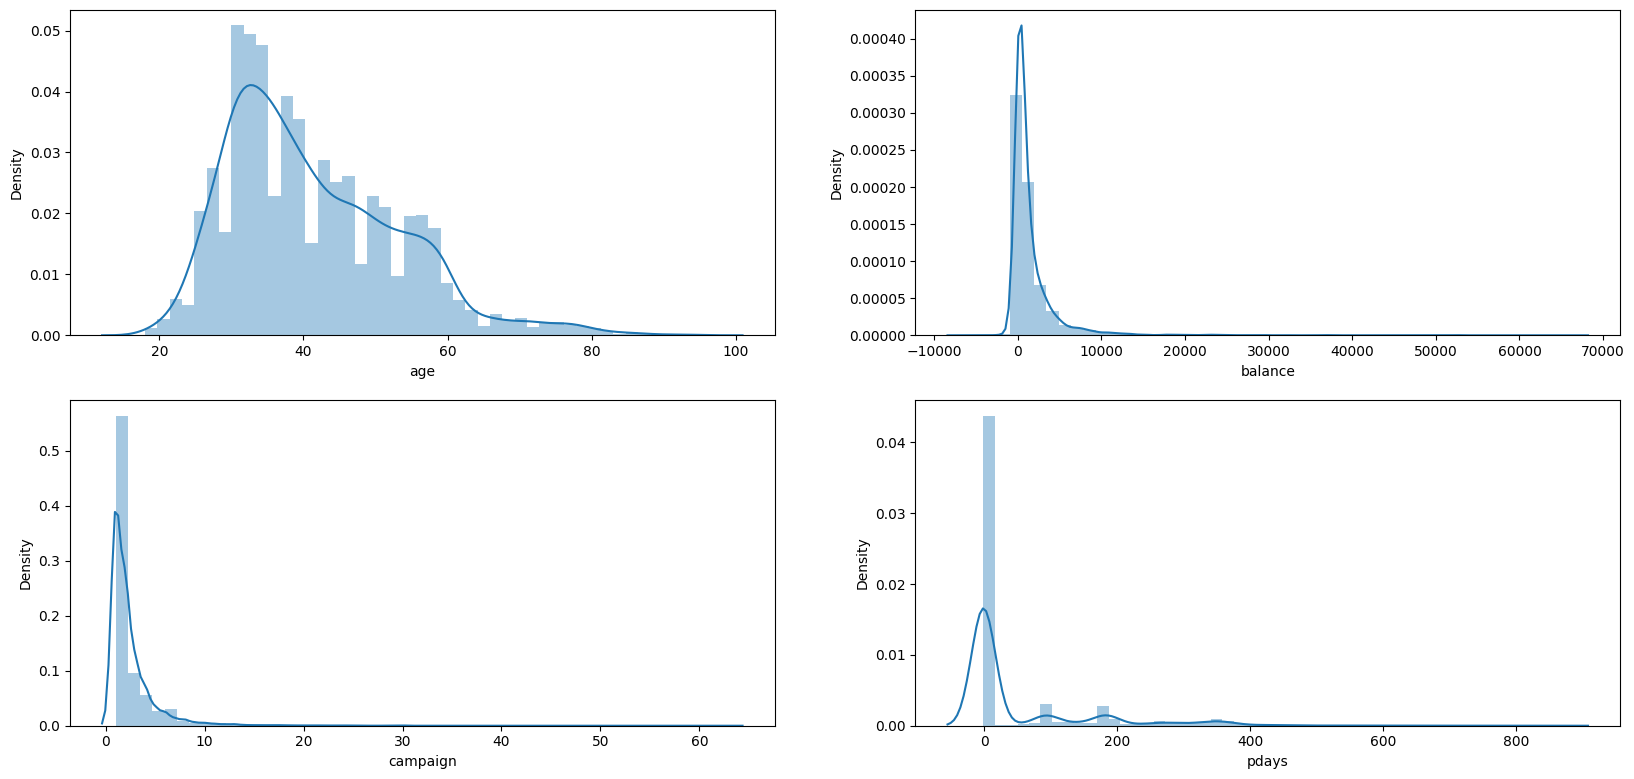

In [12]:
# Plot histogram untuk fitur numerik
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

* Data `age` cukup terdistribusi normal
* Data `balance`, `balance`, dan `pdays` tidak terdistribusi normal (right skewed) dan sepertinya memiliki outliers.

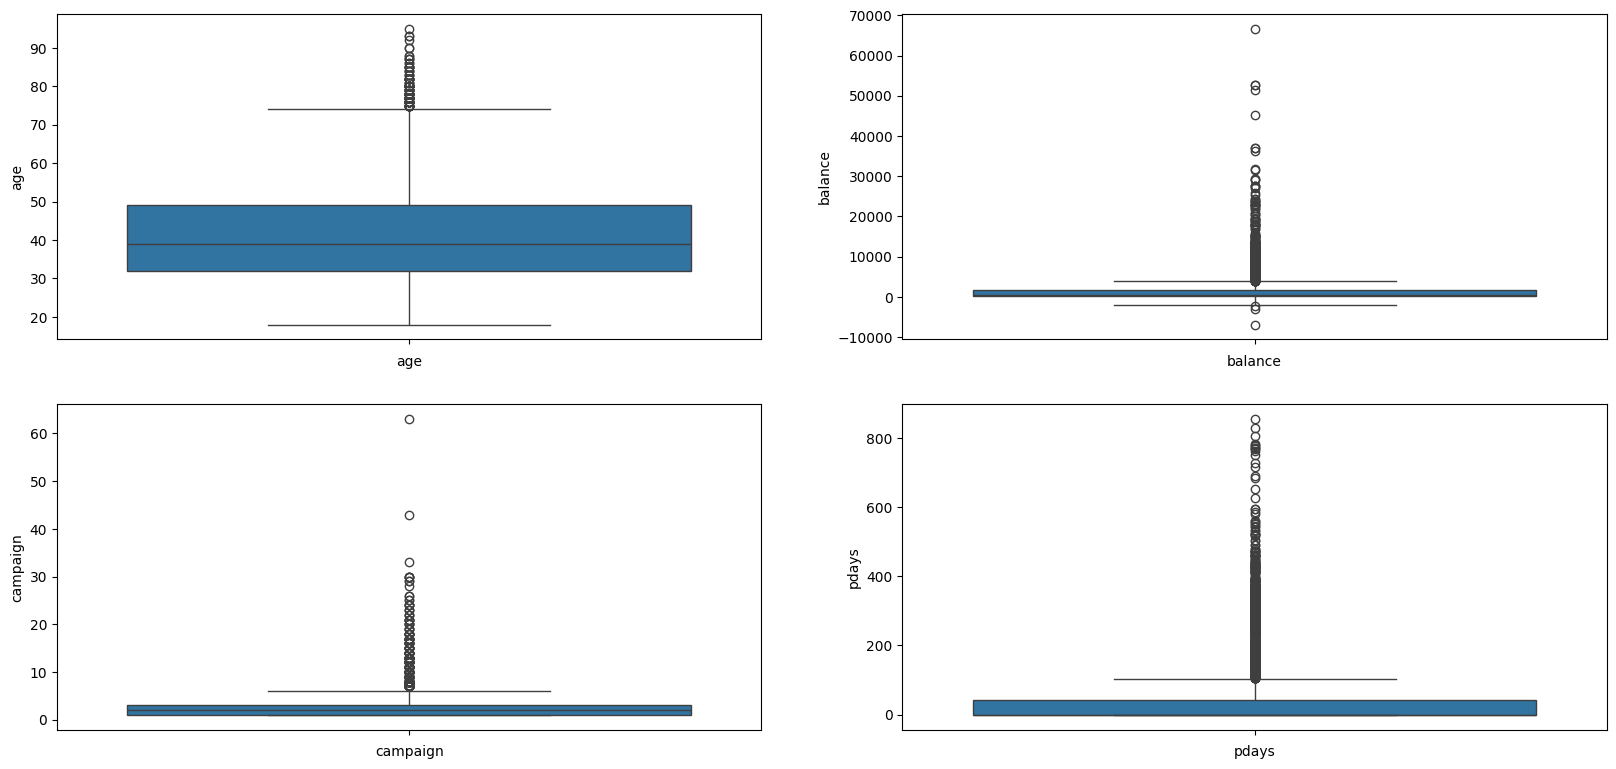

In [13]:
# Boxplot untuk mengecek outlier pada fitur numerikal
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Berdasarkan boxplot diatas, terbukti data `age` memiliki sedikit data outliers, `campaign`, `campaign`, dan `pdays` memiliki data outliers yang cukup banyak.
* Jika ditinjau lebih lanjut, data `age` memiliki data rentang 18 sampai 95 tahun. Data ini masih masuk akal.

In [14]:
# Cek outliers di `balance`
df.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2282      1
         -1965      1
         -1701      1
         -1636      1
                   ..
yes       29340     1
          31472     1
          36252     1
          45248     1
          52587     2
Name: balance, Length: 4130, dtype: int64

* Data `balance` terlihat semakin besar rata-rata pendapatan tahunan seorang nasabah, dia semakin tertarik untuk melakukan deposito, sebaliknya semakin kecil rata-rata pendapatan tahunan seorang nasabah banyak yang menolak tawaran deposito. Oleh karena itu outlier pada fitur ini tidak dihilangkan dan agar model machine learning yang dibuat bisa memprediksi dengan data secara general.

In [15]:
# Cek outliers pada `campaign`
df.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           1554
         2           1117
         3            491
         4            308
         5            160
         6            128
         7             64
         8             69
         9             32
         10            31
         11            19
         12            18
         13            20
         14             6
         15             5
         16             5
         17             7
         18             7
         19             4
         20             3
         21             5
         22             3
         23             3
         24             3
         25             2
         26             2
         28             1
         29             1
         30             4
         33             1
         43             1
         63             1
yes      1           1797
         2            987
         3            430
         4            240
         5             96
         6          

* Data `campaign` meskipun terdapat data outliers, namun datanya masih cukup masuk akal. Misalkan data paling extreme adalah seorang nasabah dikontak sebanyak 63 kali. Namun mungkin saja nasabah tersebut merupakan orang yang sangat penting dan sebanyak 63 kali masih mungkin untuk dilakukan.

Pada dasarnya, untuk dataset ini tidak ada outlier yang dihapus agar model yang dibuat nantinya lebih general dan mencerminkan variasi yang ada dalam data dunia nyata. Sehingga model nantinya lebih robust terhadap data baru.

Tipe setiap data yang ada sudah sesuai dengan fiturnya, jadi tidak perlu merubah tipe data, dan lanjut ke tahap analisis data untuk keperluan masalah yang dihadapi.

## Data Analysis

**Check Imbalance of the Data**

In [16]:
df['deposit'].value_counts()/len(df['deposit']) * 100

deposit
no     52.210122
yes    47.789878
Name: count, dtype: float64

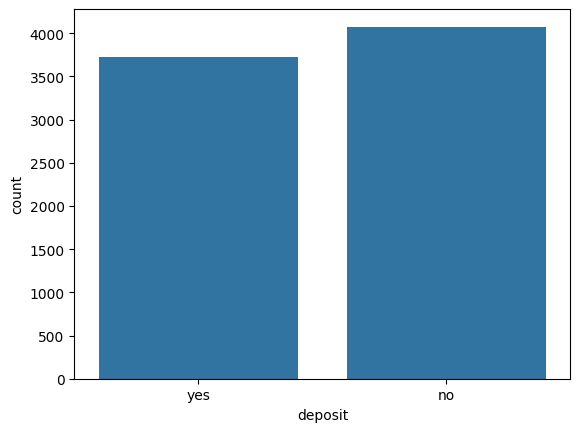

In [17]:
# Plot target
sns.countplot(x='deposit',data=df)
plt.show()

Data target cukup balanced, sehingga tidak diperlukan resampling (teknik untuk membuat data imbalance menjadi lebih balance)

**Data Correlation**

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<Axes: >

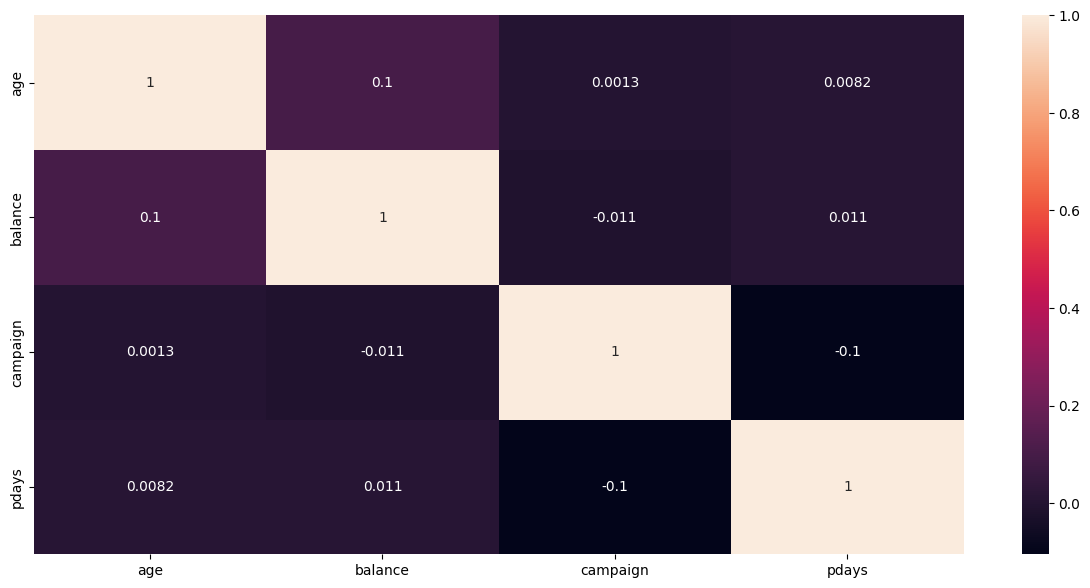

In [18]:
# Cek korelasi antar fitur
cor_mat=df[numerical_features].corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Antar fitur numerikal tidak ada yang saling berkorelasi (korelasi sangat lemah)

**Korelasi antar fitur numerikal dengan target**

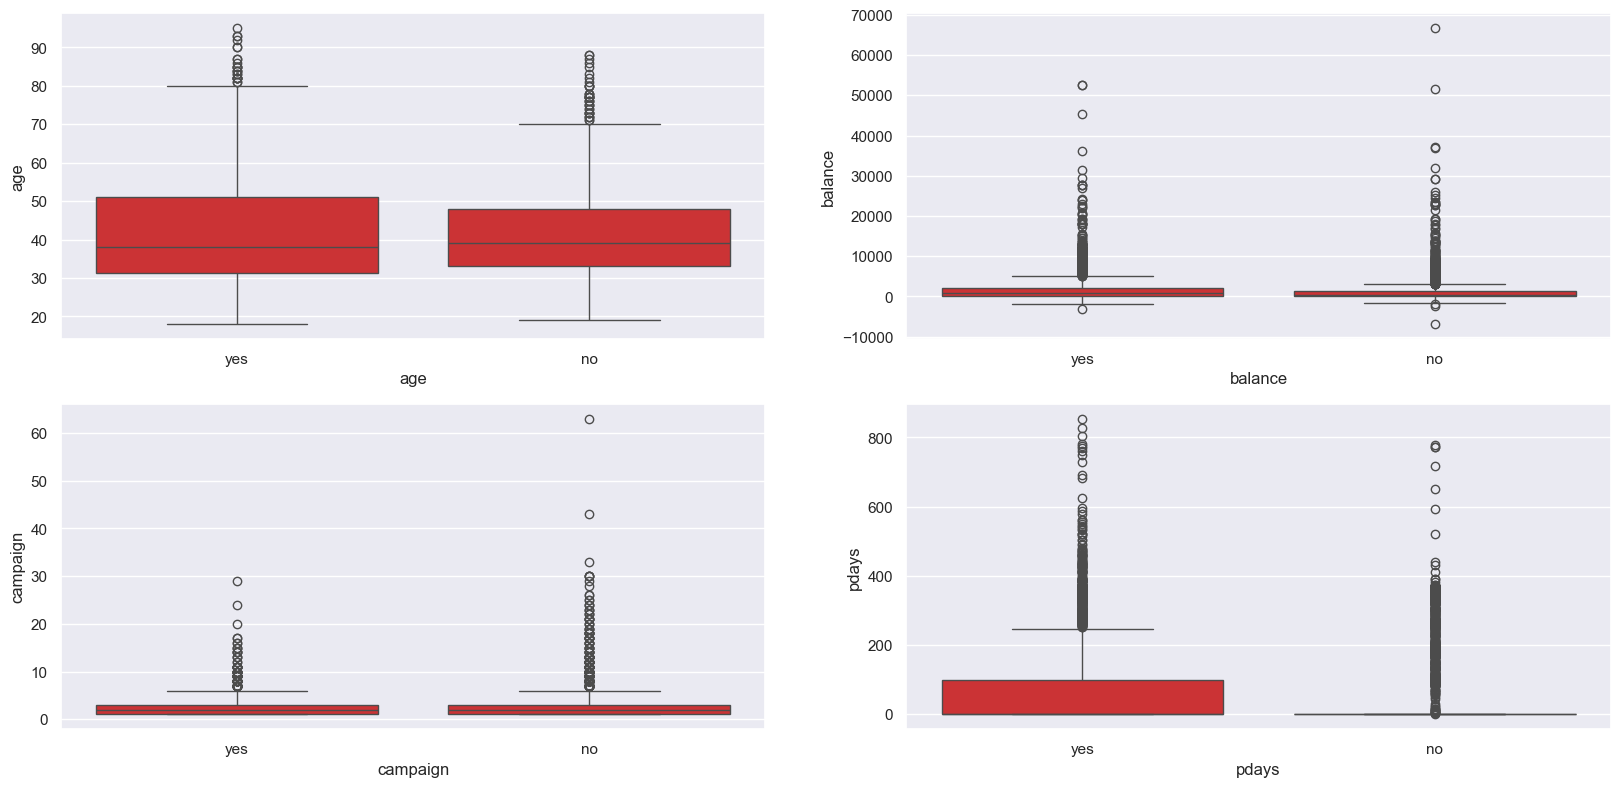

In [35]:
# Boxplot untuk menampilkan distribusi target pada fitur numerikal
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [19]:
for i in df.drop(columns=['deposit', 'job', 'housing', 'loan', 'contact', 'month', 'poutcome']).columns:
    relevent_experience_df = df.groupby(i)['deposit'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by='yes', ascending=False))

deposit,no,yes
age,,
18,NaN,1.000000
79,NaN,1.000000
93,NaN,1.000000
92,NaN,1.000000
90,NaN,1.000000
...,...,...
50,0.624060,0.375940
48,0.628205,0.371795
40,0.629956,0.370044


deposit,no,yes
balance,,
-3058,NaN,1.0
2509,NaN,1.0
2495,NaN,1.0
2489,NaN,1.0
2488,NaN,1.0
...,...,...
31868,1.0,NaN
36935,1.0,NaN
37127,1.0,NaN


deposit,no,yes
campaign,,
1,0.463742,0.536258
29,0.500000,0.500000
2,0.530894,0.469106
3,0.533116,0.466884
4,0.562044,0.437956
14,0.600000,0.400000
7,0.621359,0.378641
5,0.625000,0.375000
15,0.625000,0.375000


deposit,no,yes
pdays,,
854,NaN,1.0
239,NaN,1.0
535,NaN,1.0
246,NaN,1.0
532,NaN,1.0
...,...,...
651,1.0,NaN
717,1.0,NaN
771,1.0,NaN


**Explore the Categorical Features**

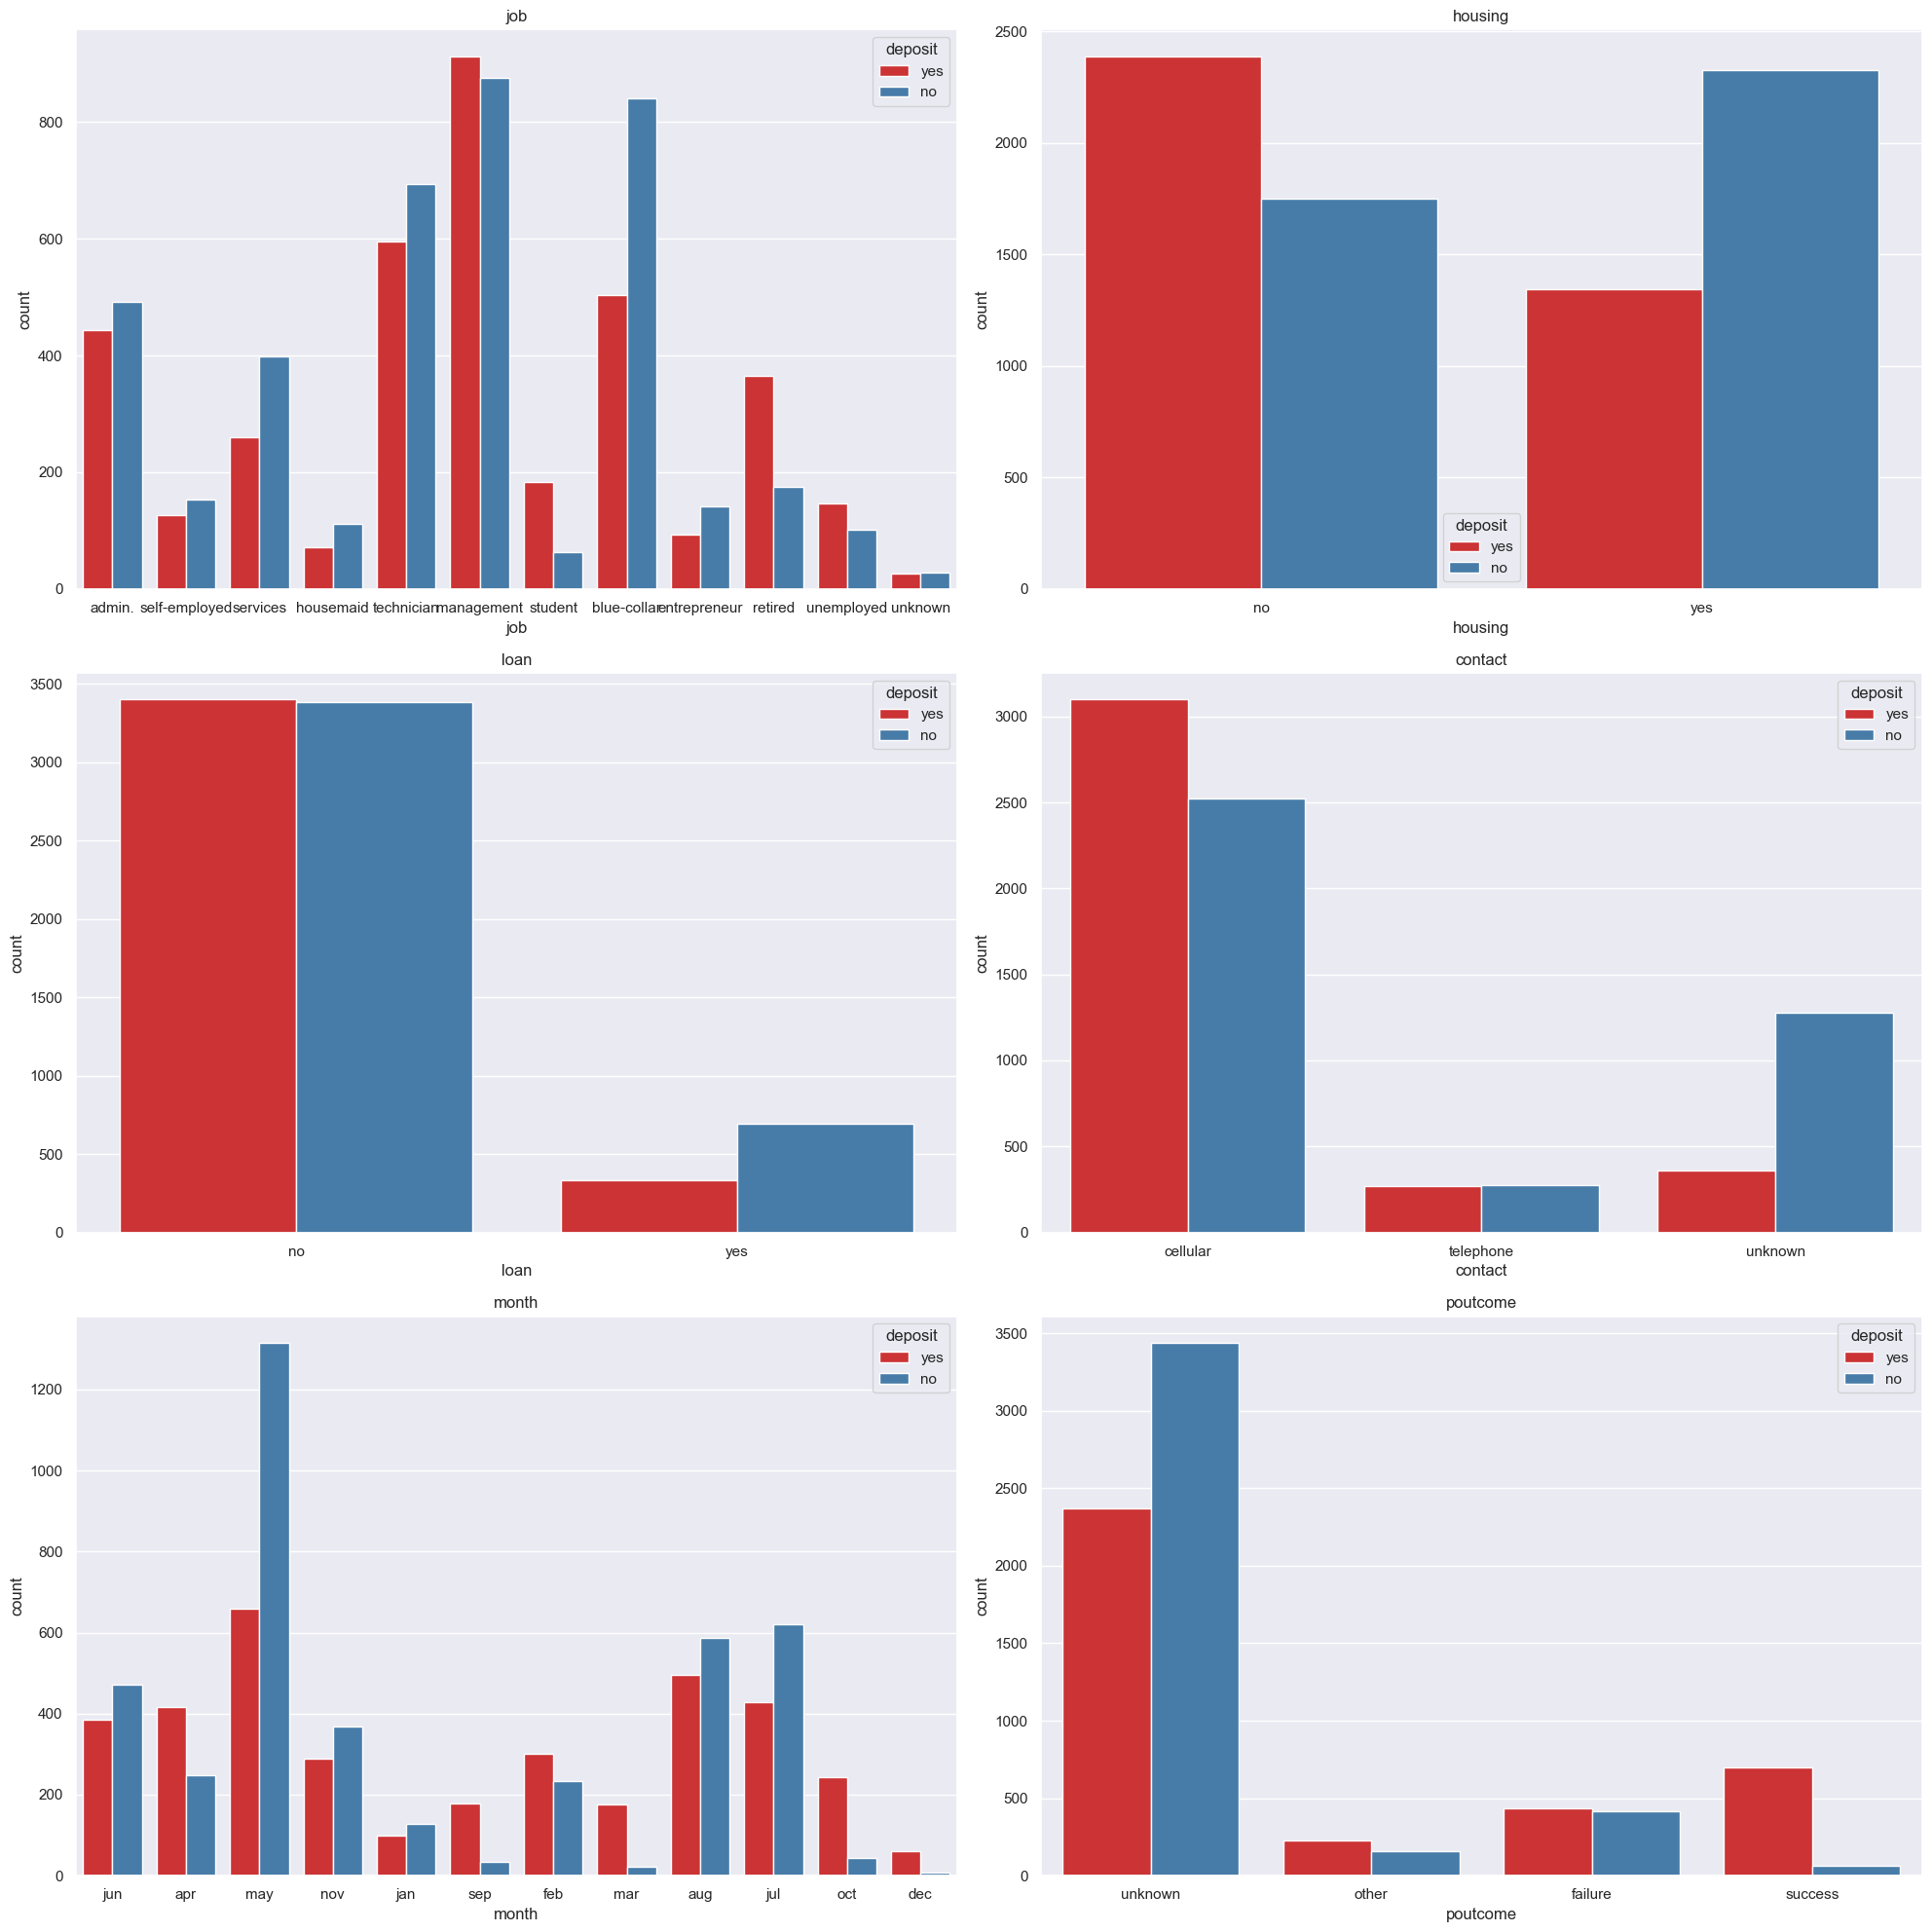

In [20]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]

plt.figure(figsize=(20, 20))
sns.set(palette='Set1')
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(3, 2, plotnumber)
    sns.countplot(x=feature, hue='deposit', data=df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()

In [21]:
for i in df.drop(columns=['deposit', 'age', 'balance', 'campaign', 'pdays']).columns:
    relevent_experience_df = df.groupby(i)['deposit'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by='yes', ascending=False))

deposit,no,yes
job,,
student,0.255061,0.744939
retired,0.324074,0.675926
unemployed,0.409639,0.590361
management,0.489659,0.510341
unknown,0.518519,0.481481
admin.,0.525641,0.474359
technician,0.538402,0.461598
self-employed,0.546429,0.453571
entrepreneur,0.601695,0.398305


deposit,no,yes
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


deposit,no,yes
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


deposit,no,yes
contact,,
cellular,0.448871,0.551129
telephone,0.505495,0.494505
unknown,0.779340,0.220660


deposit,no,yes
month,,
mar,0.110553,0.889447
dec,0.117647,0.882353
oct,0.150350,0.849650
sep,0.160377,0.839623
apr,0.373112,0.626888
feb,0.436330,0.563670
aug,0.542091,0.457909
jun,0.550758,0.449242
nov,0.558600,0.441400


deposit,no,yes
poutcome,,
success,0.085414,0.914586
other,0.412987,0.587013
failure,0.487028,0.512972
unknown,0.591637,0.408363


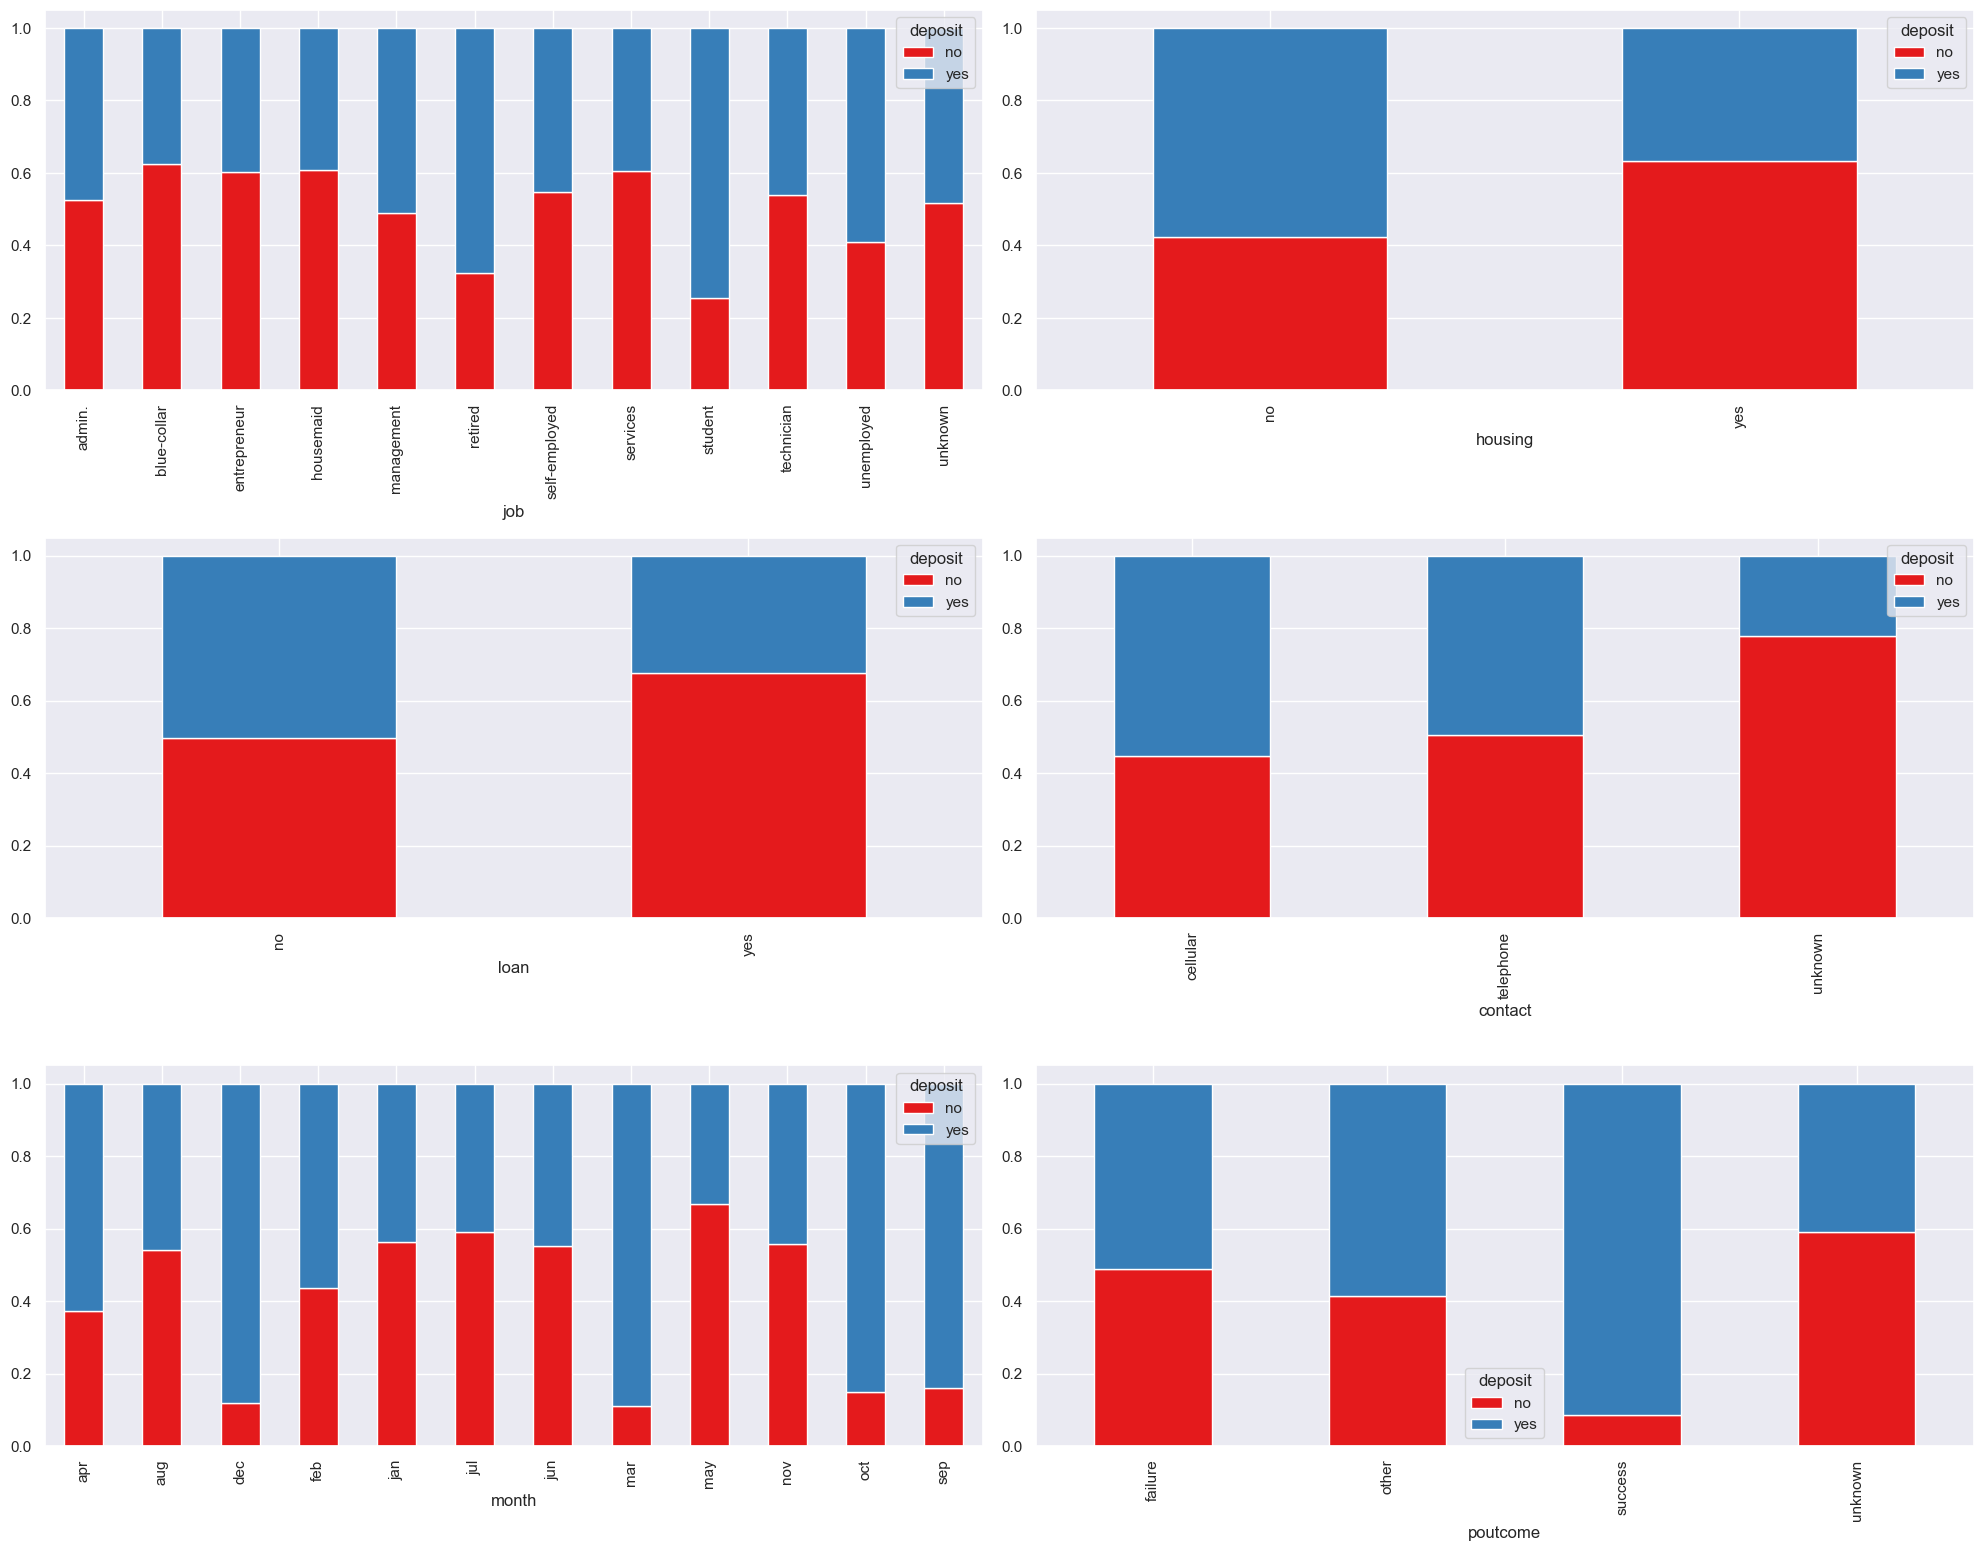

In [22]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['deposit', 'age', 'balance', 'campaign', 'pdays']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

**Analisis**:
Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :

1. `age`:
Nasabah dengan umur lebih tua lebih cenderung untuk menerima tawaran deposito. Kemungkinan karena semakin tua semakin mapan dari segi finansial.
2. `balance`:
Nasabah dengan rata-rata pendapatan lebih tinggi cenderung untuk menerima tawaran deposito. Kemungkinan karena memiliki modal untuk melakukan investasi deposito.
3. `campaign`:
Nasabah yang menerima tawaran deposito cenderung dihubungi lebih sedikit. Hal ini wajar karena ketika nasabah sudah menerima tawaran, tidak akan dihubungi lagi.
4. `pdays`:
Nasabah yang dikontak dengan rentang waktu yang lama sejak terakhir kali dikontak cenderung lebih menerima tawaran deposito.
5. `job`:
Nasabah yang memiliki pekerjaan sebagai 'student' dan sudah pensiun cenderung menerima tawaran deposito.
6. `housing`:
Nasabah yang tidak memiliki cicilan rumah cenderung menerima tawaran deposito.
7. `loan`:
Nasabah yang tidak memiliki pinjaman cenderung menerima tawaran deposito.
8. `contact`:
Nasabah yang dihubungi menggunakan 'cellular' cenderung menerima tawaran deposito.
9. `month`:
Pada bulan maret, desember, oktober, dan september, nasabah cenderung tertarik untuk menerima tawaran deposito. Sementara pada bulan May meskipun banyak nasabah yang dihubungi, namun ratio tidak menerima tawaran deposito sangat besar.
10. `poutcome`:
Nasabah yang pada campaign sebelumnya menerima tawaran deposito, cenderung akan menerima kembali tawaran deposito.

## Data Preparation

In [23]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [24]:
df2 = df.copy()

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Mengubah fitur/kolom `job` menggunakan Binary Encoding karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
2. Mengubah fitur/kolom `housing` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique datanya hanya sedikit.
3. Mengubah fitur/kolom `loan` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique datanya hanya sedikit.
4. Mengubah fitur/kolom `contact` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique datanya hanya sedikit.
5. Mengubah fitur/kolom `month` menggunakan Binary Encoding karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
6. Mengubah fitur/kolom `poutcome` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal dan jumlah unique datanya hanya sedikit.


In [25]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['housing','loan', 'contact', 'poutcome']),
    ('binary', ce.BinaryEncoder(), ['job', 'month'])
], remainder='passthrough')

In [26]:
# Mengubah data pada kolom `deposit` yang merupakan target menjadi nilai 1 dan 0 (sebelumnya tipe data object)
bool_columns = ['deposit']
for col in  bool_columns:
    df2[col+'_new']=df2[col].apply(lambda x : 1 if x == 'yes' else 0)
    df2.drop(col, axis=1, inplace=True)

In [27]:
# Memisahkan fitur dengan target
x = df2.drop(columns=['deposit_new'])
y = df2['deposit_new']

In [28]:
# Splitting dataset menjadi data train dan data test
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=2022)

In [29]:
# Encoding
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__contact_unknown,onehot__poutcome_other,onehot__poutcome_success,onehot__poutcome_unknown,binary__job_0,binary__job_1,binary__job_2,binary__job_3,binary__month_0,binary__month_1,binary__month_2,binary__month_3,remainder__age,remainder__balance,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0,1039.0,3.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40.0,949.0,1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,30.0,5359.0,1.0,191.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,80.0,997.0,1.0,91.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,47.0,1453.0,1.0,-1.0


## **Modeling & Evaluation**

In [31]:
# Model machine learning
logreg = LogisticRegression(random_state=2022)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2022)
rf = RandomForestClassifier(random_state=2022)
gbc = GradientBoostingClassifier(random_state=2022)
xgb = XGBClassifier(random_state=2022)
lgbm = lgb.LGBMClassifier(random_state=2022)
ada = AdaBoostClassifier(dt, random_state=2022)

#### **Model Benchmarking : Stratified K-Fold**

In [32]:
# Model benchmarking
models = [logreg,knn,dt,rf,gbc,xgb,lgbm,ada]
score = []
rata = []
std = []

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'Extreme Gradient Boost', 'Light Gradient Boost', 'Adaboost'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

[LightGBM] [Info] Number of positive: 2387, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 4995, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477878 -> initscore=-0.088546
[LightGBM] [Info] Start training from score -0.088546
[LightGBM] [Info] Number of positive: 2387, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 4995, number of used features: 19
[LightGBM] [Info] [binary:

,mean f1,sdev
model,,
Gradient Boost,0.670829,0.013194
Random Forest,0.668196,0.017499
Extreme Gradient Boost,0.664397,0.011096
Light Gradient Boost,0.663363,0.016277
Logistic Regression,0.638048,0.012467
Adaboost,0.615844,0.021057
Decision Tree,0.608981,0.022692
KNN,0.539613,0.022770


Terlihat bahwa model Gradient Boost adalah yang terbaik untuk f1 score-nya dari setiap model yang menggunakan default hyperparameter

### **Model Benchmarking: Test Data**

In [33]:
models = [logreg, knn, dt, rf, gbc, xgb, lgbm, ada]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'Extreme Gradient Boost', 'Light Gradient Boost', 'Adaboost']

score_f1 = []

def y_pred_func(model, x_train, y_train, x_test):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test)

for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model, x_train, y_train, x_test)
    score_f1.append(f1_score(y_test, y_pred))
    print(name, '\n', classification_report(y_test, y_pred))
    
pd.DataFrame({
    'model': model_names,
    'f1 score': score_f1
}).set_index('model').sort_values(by='f1 score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       815
           1       0.68      0.68      0.68       746

    accuracy                           0.69      1561
   macro avg       0.69      0.69      0.69      1561
weighted avg       0.69      0.69      0.69      1561

KNN 
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       815
           1       0.59      0.53      0.56       746

    accuracy                           0.60      1561
   macro avg       0.60      0.60      0.60      1561
weighted avg       0.60      0.60      0.60      1561

Decision Tree 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       815
           1       0.61      0.59      0.60       746

    accuracy                           0.63      1561
   macro avg       0.62      0.62      0.62      1561
weighted avg       0.62      0

,f1 score
model,
Gradient Boost,0.682671
Light Gradient Boost,0.681919
Logistic Regression,0.678284
Extreme Gradient Boost,0.670986
Random Forest,0.670471
Adaboost,0.609048
Decision Tree,0.599040
KNN,0.560284


Terlihat kembali lagi model Gradient Boost adalah yang terbaik performanya pada data test.

### **Hyperparameter Tuning**

References: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**Gradient Boost**

In [34]:
# depth of tree
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# number of tree
n_estimators = list(np.arange(50,500))

# number of train set in each tree (% of total number of train set rows)
subsample = list(np.arange(2,10)/10)

# number of features used for splitting in tree (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)

# Hyperparameter space GBC
hyperparam_space_gbc = {
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

default parameter Gradient Boost:
1. max_depth = 3
2. learning_rate = 0.1
3. n-estimators = 100
4. subsample = 1.0
5. max_features = None

Sumber: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [37]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
gbc = GradientBoostingClassifier(random_state = 2022)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ## ('oversampling',ros),
    ('tansformer', transformer),
    ('model', gbc)
    ])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc,
    param_distributions = hyperparam_space_gbc,
    cv = skf,
    scoring = 'f1',
    n_jobs = -1,
    n_iter=20,
    random_state=2022
)

In [38]:
random_gbc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('model',
                                              GradientBoostingClassifier(random_stat...
                                                                 0.21, 0.22,
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2022, scoring='f1')

In [39]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,3.854616,0.293102,0.058469,0.006507,0.8,339,0.6,2,0.08,"{'model__subsample': 0.8, 'model__n_estimators...",0.672131,0.664165,0.663139,0.662911,0.688827,0.670235,0.009901,1
13,1.559593,0.075047,0.051313,0.004683,0.8,199,0.2,2,0.36,"{'model__subsample': 0.8, 'model__n_estimators...",0.659889,0.659813,0.672630,0.657303,0.686981,0.667323,0.011195,2
8,3.918492,0.065285,0.059759,0.011024,0.2,484,0.2,3,0.14,"{'model__subsample': 0.2, 'model__n_estimators...",0.666078,0.648250,0.662609,0.643657,0.692656,0.662650,0.017206,3
10,2.450910,0.081908,0.056069,0.011301,0.5,321,0.2,2,0.33,"{'model__subsample': 0.5, 'model__n_estimators...",0.672101,0.643188,0.647788,0.656772,0.670944,0.658159,0.011760,4
2,1.729888,0.032478,0.051315,0.002945,0.3,300,0.4,1,0.6,"{'model__subsample': 0.3, 'model__n_estimators...",0.644628,0.630811,0.649737,0.646265,0.675579,0.649404,0.014585,5


In [40]:
print('GBC')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

GBC
Best_score: 0.6702347420290301
Best_params: {'model__subsample': 0.8, 'model__n_estimators': 339, 'model__max_features': 0.6, 'model__max_depth': 2, 'model__learning_rate': 0.08}


Hyperparameter terbaik dari Gradient Forest dari RandomizedSearch :
1. max_depth = 2
2. learning_rate = 0.08
3. n-estimators = 339
4. subsample = 0.8
5. max_features = 0.6

### **Model Performance in Test Set**

**Before Hyperparameter Tuning**

In [41]:
model = GradientBoostingClassifier(random_state=2022)

model_pipe = Pipeline([
    # ('oversampling',ros),
    ('tansformer', transformer),
    ('model', model)
    ])

model_pipe.fit(x_train, y_train)

y_pred = model_pipe.predict(x_test)
f1_score(y_test, y_pred)

0.6826706676669168

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       815
           1       0.78      0.61      0.68       746

    accuracy                           0.73      1561
   macro avg       0.74      0.72      0.72      1561
weighted avg       0.74      0.73      0.72      1561



Text(0.5, 1.0, 'GradientBoosting before tuning')

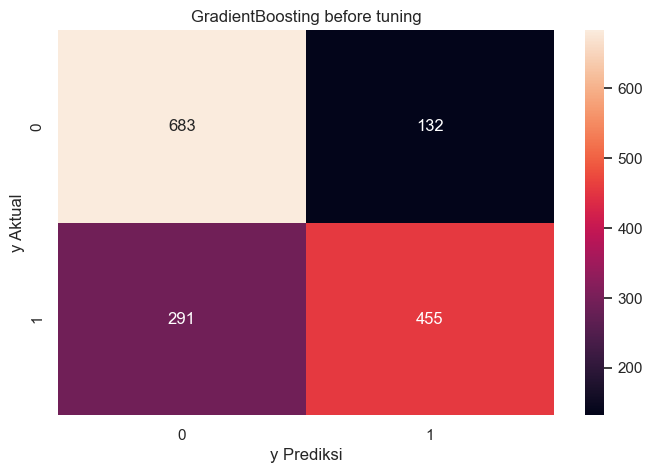

In [43]:
# GradientBoost before tuning
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GradientBoosting before tuning')

**After Hyperparameter Tuning**

In [44]:
# best model
gbc_tuning = random_gbc.best_estimator_

# fitting
gbc_tuning.fit(x_train, y_train)

# predict
y_pred_gbc_tuning = gbc_tuning.predict(x_test)

# recall score
f1_score_gbc_tuning = f1_score(y_test, y_pred_gbc_tuning)
f1_score_gbc_tuning

0.6770601336302895

In [45]:
print(classification_report(y_test, y_pred_gbc_tuning))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       815
           1       0.76      0.61      0.68       746

    accuracy                           0.72      1561
   macro avg       0.73      0.72      0.72      1561
weighted avg       0.73      0.72      0.72      1561



Text(0.5, 1.0, 'GradientBoosting after tuning')

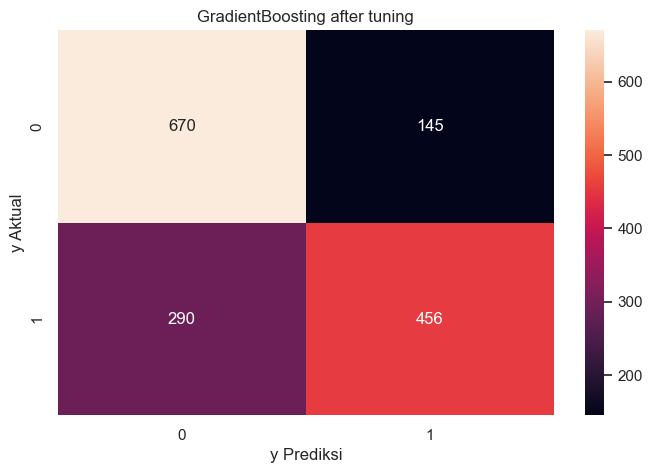

In [46]:
# GradientBoost after tuning
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GradientBoosting after tuning')

Berdasarkan hasil performa pada test data, terlihat bahwa model terbaik tetap `Gradient Boost before Hyperparameter Tuning`

## **Final Model**

In [47]:
model_final = Pipeline([
    ('transformer', transformer),
    ('model', GradientBoostingClassifier(random_state=2022))
])

model_final.fit(x_train, y_train)

y_pred = model_final.predict(x_test)

**Feature Importance**

In [48]:
imp = model_final['model'].feature_importances_
imp

array([7.18841398e-02, 1.88354681e-02, 8.40043649e-03, 1.72804870e-01,
       1.84105122e-03, 2.68842395e-01, 6.51961874e-04, 2.60163967e-04,
       2.25164339e-03, 1.69987479e-03, 1.51357524e-03, 4.11741904e-02,
       2.98701107e-02, 5.32287406e-02, 3.22075738e-02, 8.12481972e-02,
       8.16919114e-02, 5.12169288e-02, 8.03767668e-02])

In [49]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'job_0',
 'job_1',
 'job_2',
 'job_3',
 'month_0',
 'month_1',
 'month_2',
 'month_3',
 'age',
 'balance',
 'campaign',
 'pdays']

In [50]:
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Feature':list_features
}).sort_values(by='Importance', ascending = False)

feature_imp

,Importance,Feature
5,0.268842,poutcome_success
3,0.172805,contact_unknown
16,0.081692,balance
15,0.081248,age
18,0.080377,pdays
0,0.071884,housing_yes
13,0.053229,month_2
17,0.051217,campaign
11,0.041174,month_0
14,0.032208,month_3


<Axes: xlabel='Importance', ylabel='Feature'>

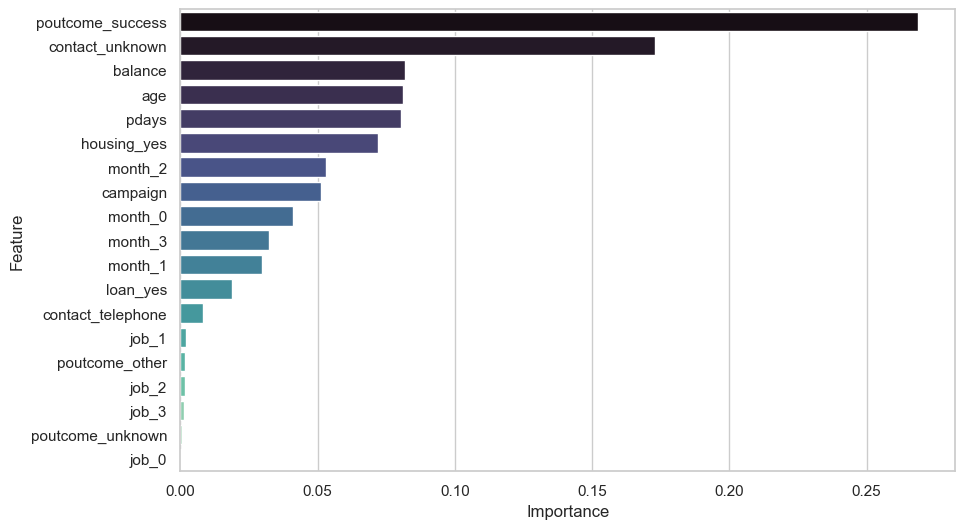

In [51]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient='h', palette='mako')

Dari barplot diatas, poutcome_success, contact_unknown, balance, age, dan pdays termasuk fitur yang penting untuk model. Sementara fitur seperti job tidak terlalu berpengaruh.

In [66]:
import shap

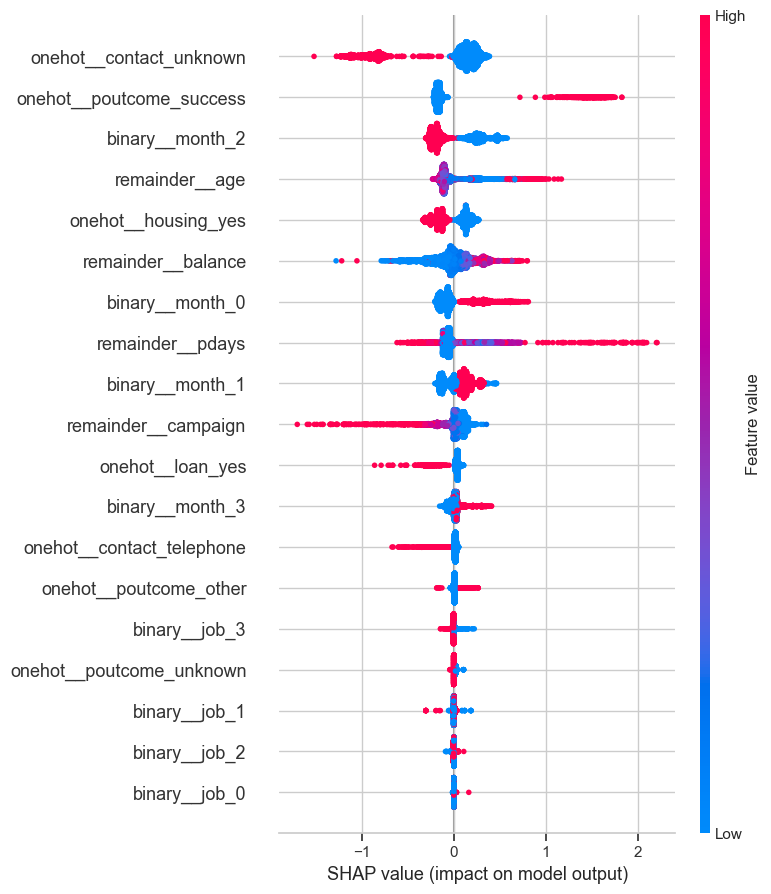

In [68]:
# Compute SHAP values
explainer = shap.TreeExplainer(model_final.named_steps['model'])
shap_values = explainer.shap_values(model_final.named_steps['transformer'].transform(x_train))

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, model_final.named_steps['transformer'].transform(x_train), feature_names=model_final.named_steps['transformer'].get_feature_names_out())

* Fitur terpenting:

    Fitur yang memiliki batang tertinggi dan nilai Shap tertinggi adalah fitur yang paling penting dalam model.
    Dalam contoh ini, fitur terpenting adalah onehot contact_unknown, onehot_poutcome_success, dan binary_month_2.

* Fitur yang meningkatkan probabilitas:

    Fitur dengan batang biru dan nilai Shap positif meningkatkan probabilitas prediksi model.
    Dalam contoh ini, fitur yang meningkatkan probabilitas adalah onehot contact_unknown, onehot_poutcome_success, binary_month_2, binary_month_0, binary_month_1, dan onehot_loan_yes.

* Fitur yang menurunkan probabilitas:

    Fitur dengan batang merah dan nilai Shap negatif menurunkan probabilitas prediksi model.
    Dalam contoh ini, fitur yang menurunkan probabilitas adalah remainder_age, remainder_balance, remainder_pdays, binary___job_3, binary___job_1, binary___job_2, dan binary___job_0.

## **Conclusion & Recommendation**

In [52]:
print('Classification Report Gradient Boosting : \n', classification_report(y_test, y_pred_gbc_tuning))

Classification Report Gradient Boosting : 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75       815
           1       0.76      0.61      0.68       746

    accuracy                           0.72      1561
   macro avg       0.73      0.72      0.72      1561
weighted avg       0.73      0.72      0.72      1561



Berdasarkan laporan klasifikasi diatas, kita dapat melihat hasil prediksi model untuk kedua kelas: kelas 0 (orang yang tidak tertarik untuk melakukan deposit) dan kelas 1 (orang yang tertarik untuk melakukan deposit).

1. Untuk kelas 0 (orang yang tidak tertarik untuk melakukan deposit), model memiliki precision sebesar 0.70, recall sebesar 0.82, dan f1-score sebesar 0.75. Artinya, dari orang-orang yang diprediksi tidak tertarik, sekitar 70% di antaranya benar-benar tidak tertarik (precision), dan model mampu mendeteksi sekitar 82% dari total orang yang sebenarnya tidak tertarik (recall). F1-score yang cukup tinggi menunjukkan keseimbangan antara precision dan recall untuk kelas ini.

2. Untuk kelas 1 (orang yang tertarik untuk melakukan deposit), model memiliki precision sebesar 0.76, recall sebesar 0.61, dan f1-score sebesar 0.68. Ini berarti, dari orang-orang yang diprediksi tertarik, sekitar 76% di antaranya benar-benar tertarik (precision), dan model mampu mendeteksi sekitar 61% dari total orang yang sebenarnya tertarik (recall). Meskipun f1-score untuk kelas ini sedikit lebih rendah dibandingkan dengan kelas 0, namun masih menunjukkan performa yang baik dalam mendeteksi orang-orang yang tertarik.

Dari segi keseluruhan, model Gradient Boost mencapai akurasi sebesar 0.73, yang berarti sekitar 73% dari keseluruhan data dapat diprediksi dengan benar oleh model. Selain itu model cenderung lebih baik dalam mengidentifikasi orang yang akan menolak tawaran deposit. 

Meskipun demikian, ada beberapa hal yang perlu diperhatikan untuk meningkatkan efisiensi dari segi cost dan waktu:

1. Fokus pada peningkatan recall untuk kelas 1 (orang yang tertarik melakukan deposit) dapat membantu dalam menjangkau lebih banyak orang yang sebenarnya tertarik, sehingga dapat memaksimalkan potensi penerimaan deposit.
2. Peningkatan precision untuk kelas 0 (orang yang tidak tertarik melakukan deposit) juga penting untuk mengurangi kesalahan prediksi terhadap orang-orang yang sebenarnya tertarik, sehingga mengoptimalkan penggunaan sumber daya.

Dengan mengoptimalkan kedua aspek ini, model dapat menjadi lebih efisien dalam memprediksi calon pelanggan yang akan melakukan deposit, sehingga dapat mengurangi biaya dan waktu yang diperlukan dalam kampanye pemasaran.

Hal-hal yang bisa dilakukan untuk mengembangkan model menjadi lebih baik lagi :

- Memperbaiki model yang telah ada atau melakukan perbaikan pada model yang sudah dibuat sebelumnya.
- Menambahkan fitur-fitur baru atau kolom-kolom baru yang berpotensi terkait dengan minat nasabah, seperti riwayat transaksi, tingkat pendidikan, dan lainnya.
- Mencoba algoritma Machine Learning yang berbeda dan juga melakukan tuning kembali pada hyperparameter

**Perhitungan Hasil Model**

* Rata-rata biaya pemasaran deposito per bank berkisar antara 0,5% hingga 2,5% dari total dana deposito. (Ambil 1.5%)
* Rata-rata suku bunga deposito berjangka 1 bulan: 4,82%
* Rata-rata suku bunga Kredit Bank Indonesia (SBI) berjangka 1 bulan: 5,75%
* Minimum deposito sekitar Rp 1.000.000,00

* Type I Error

    Biaya pemasaran per orang = 1.5% * 1000000 = Rp 15.000,00

* Type II Error

    Profit per nasabah = (5,75% - 4,82%) * 1000000 = Rp 9.300,00

Misalkan ada 200 orang (100 tertarik dan 100 lagi tidak tertarik)

**Tanpa Model**

Type I

- Total Biaya => 200 x Rp 15.000,00 = Rp 3.000.000,00
- Total Kandidat Tertarik yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total Kandidat Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 100 x Rp 15.000,00 = Rp 1.500.000,00 (karena 100 orang menolak dan menjadi sia-sia)

Type II
- Total kehilangan profit = 100 x Rp 9.300,00 = Rp 930.000,00

**Dengan Model**

Type I
- FP = (1-0.76) x 100 = 24 orang yang salah prediksi (seharusnya tidak tertarik, tapi karena model prediksi tertarik jadi dihubungi)
- Biaya yang terbuang => 24 x Rp 15.000,00 = Rp 360.000,00
- Total Kandidat Tertarik yang didapatkan => 76 orang (karena recall 1/yg tertarik itu 76%)
- Total Biaya => (76 x Rp 15.000,00) + (24 x Rp 15.000,00) = Rp 1.500.000,00
- Menghemat = Rp 1.500.000,00

Type II
- Total potensial kehilangan profit = (100-24) x Rp 9.300,00 = Rp 706.800,00
- Menghemat = Rp 223.200,00

Sumber:
- https://www.bi.go.id/id/publikasi/laporan/Pages/Laporan-Keuangan-Tahunan-BI-2022.aspx
- https://www.federalreserve.gov/
- https://lps.go.id/
- https://www.bi.go.id/id/e404.aspx
- https://www.ojk.go.id/
- https://www.bankbjb.co.id/page/deposito-bisnis
- https://www.bankmandiri.co.id/suku-bunga-dana

## Save Model

In [53]:
# Save Model
pickle.dump(model_final, open('Model_Final_GB.sav', 'wb'))

## Thank You!!!